**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : Youssef Chouay <br/>
Numéro d'étudiant : 300162426

# Analyse Exploratoire

## Importer les bibliothèques importantes


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import KNNImputer

## Importation des jeux de données


In [26]:
urls = ["https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/wine-quality.csv",
            "https://github.com/Youssef2430/csi4506/raw/refs/heads/main/1.Assignment/16p_db.csv",
            "https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/dermatology_db.csv",
            "https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/car_db.data",
            "https://github.com/Youssef2430/csi4506/raw/refs/heads/main/1.Assignment/credit_score_db.csv",
            "https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/glass_db.csv",
            "https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/health_risk_db.csv"
            ]

## 1. **Analyse des valeurs manquantes** 
#### 1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?
Les jeux de données avec des valeurs manquantes sont : Le jeu de données sur la dermatologie et celui sur le score de crédit.


#### 1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.
La méthodologie utilisée pour cette investigation est de vérifier les valeurs manquantes dans chaque colonne du jeu de données.
J'utilise une liste de valeurs qui représentent des valeurs manquantes et je vérifie si la colonne contient une de ces valeurs.
Si la colonne contient une de ces valeurs, je considère que la colonne contient des valeurs manquantes.
J'affiche le nombre de valeurs manquantes pour chaque colonne.
Et si un des jeux de données contient des valeurs manquantes, j'affiche une visualisation des valeurs manquantes pour chaque colonne.

In [34]:
def check_missing_values(dataset, missing_values):
    # Decouverte du dataset
    # print(dataset.dtypes)
    ## Get columns with missing values
    columns_with_missing = []
    for column in dataset.columns:
        if dataset[column].isin(missing_values).any() or dataset[column].isnull().any():
            columns_with_missing.append(column)

    if len(columns_with_missing) > 0:
        print("Colonnes avec des valeurs manquantes :", columns_with_missing)
        ## Count of missing values for each column
        missing_count = dataset.isin(missing_values).sum() + dataset.isnull().sum()
        print("\nNombre de valeurs manquantes par colonne :")
        print(missing_count[missing_count > 0])
        print("Valeurs manquantes detectées, Visualisation des valeurs manquantes")
        visualiser_valeurs_manquantes(dataset, missing_values)
        return True
    else:
        return False


def visualiser_valeurs_manquantes(dataset, missing_values):
    # Exemple de visualisation des valeurs manquantes
    plt.figure(figsize=(12, 6))
    sns.barplot(x=(dataset.isin(missing_values) + dataset.isnull()).sum(), y=dataset.columns)
    plt.title('Visualisation des valeurs manquantes')
    plt.show()

Analyse du dataset :  wine-quality.csv
* Dataset sans valeurs manquantes


Analyse du dataset :  16p_db.csv
* Dataset sans valeurs manquantes


Analyse du dataset :  dermatology_db.csv
Colonnes avec des valeurs manquantes : ['age']

Nombre de valeurs manquantes par colonne :
age    8
dtype: int64
Valeurs manquantes detectées, Visualisation des valeurs manquantes


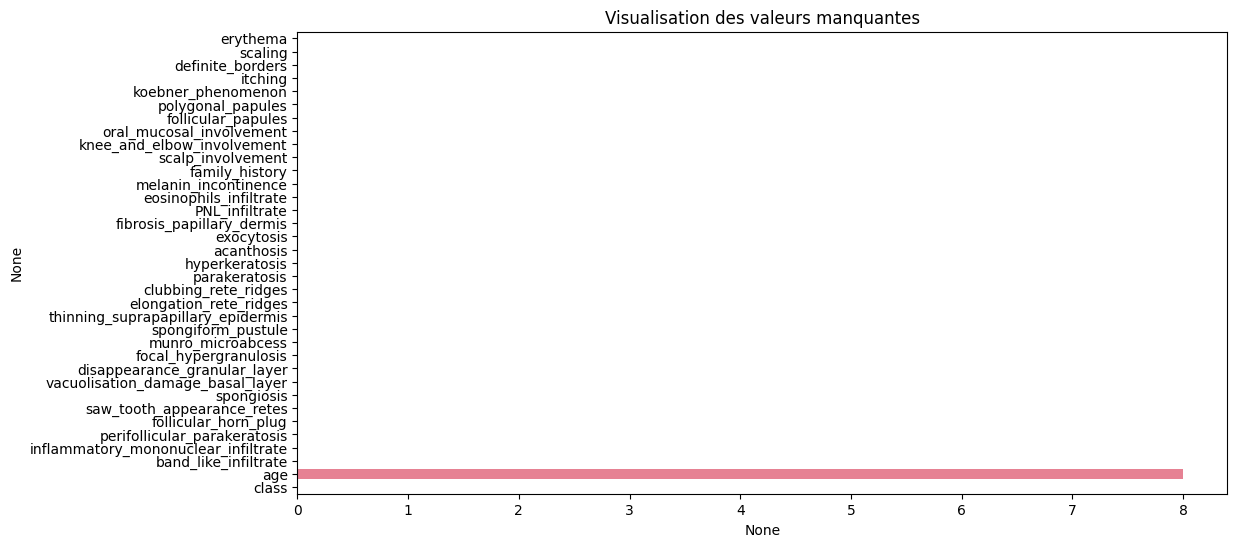

* Dataset avec des valeurs manquantes


Analyse du dataset :  car_db.data
* Dataset sans valeurs manquantes


Analyse du dataset :  credit_score_db.csv
Colonnes avec des valeurs manquantes : ['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']

Nombre de valeurs manquantes par colonne :
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64
Valeurs manquantes detectées, Visualisation des valeurs manquantes


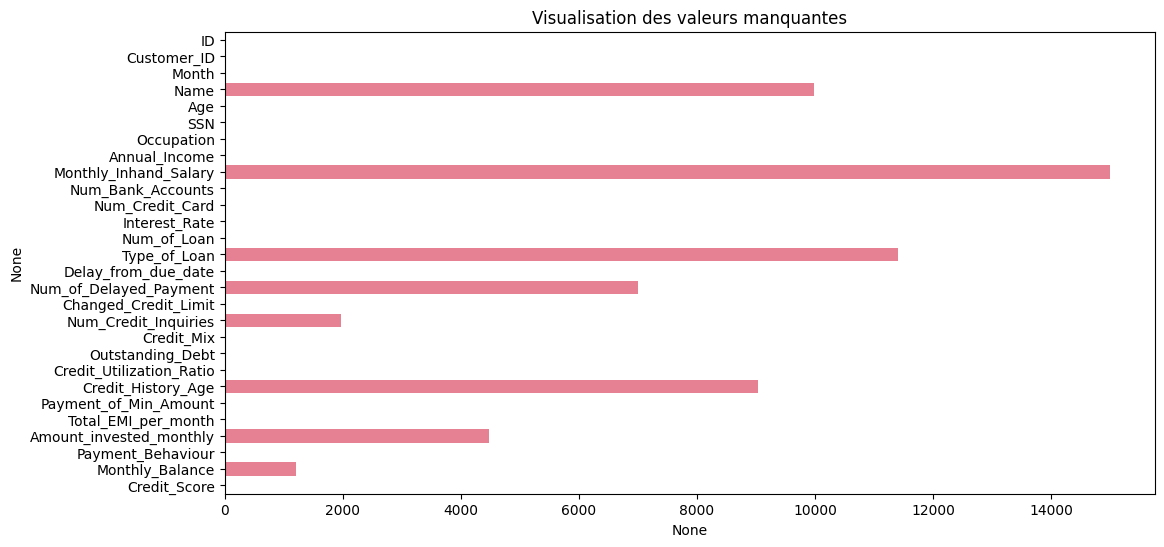

* Dataset avec des valeurs manquantes


Analyse du dataset :  glass_db.csv
* Dataset sans valeurs manquantes


Analyse du dataset :  health_risk_db.csv
* Dataset sans valeurs manquantes




In [35]:
# Liste des valeurs qui représentent des valeurs manquantes
missing_values = ['?', '', 'NA', 'N/A', 'nan', 'NaN', 'None']

urls_with_missing_values = []
for url in urls:
    dataset = pd.read_csv(url, encoding='ISO-8859-1', low_memory=False)
    print("Analyse du dataset : ", url.split('/')[-1])
    if check_missing_values(dataset, missing_values):
        print("* Dataset avec des valeurs manquantes")
        urls_with_missing_values.append(url)
    else:
        print("* Dataset sans valeurs manquantes")
    print("\n")

#### 1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.

Pour traiter les valeurs manquantes, plusieurs stratégies peuvent être utilisées. Dans notre cas, nous avant deux jeux de données avec des valeurs manquantes.
- Pour le jeu de données sur la dermatologie, la catégorie `age` est manquante. L'une des stratégies qu'on pourrait utiliser serait de remplacer les valeurs manquante par la moyenne ou la médiane, vu que de 1; il y a un nombre petit de valeurs manquantes. Et 2, cela ne devrait pas changer la distribution (surtout si on utilise la médiane).

- Pour le jeu de données sur le score de crédit, beacoup plus de valeurs sont manquantes. Pour `Name`, une simple génération de caratères serait suffisantes vu que, dans tout les cas, ce n'est pas vraiment une classe pertinante pour notre usage du jeu de données et serait sans doute supprimer du jeu d'entrainement. Pour `Amount_invested_monthly` et `Monthly_Balance`, une interpolation par spline pourrait être la meilleure approche vu qu'elle permetterait de prendre en considération l'aspect continue des variables tout en s'adaptant au côté complexe et changeant de ces variables (vu qu'elles augmentent et diminue avec le temps). Quant au variables `Monthly_Inhand_Salary`, `Num_of_Delayed_Payment`, `Num_Credit_Inquiries`, `Type_of_Loan`, et `Credit_History_Age`, une approche par modèle prédictif serait surement la meilleure méthode. On pourrait utiliser l'algorithme du 'K plus proches voisins', qui saurait prendre avantage des relations entre ces variables en nous permettant de remplacer les variables manquantes par des valeurs qui font le plus de sens.

## 2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** 

#### 2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


J'ai choisis le jeu de données sur la qualité du vin. L'objectif de la tâche est de prédire la qualité du vin en fonction de ses caractéristiques. Cette tâche est destinée à l'industrie du vin, pour aider les producteurs à prédire la qualité de leur vin en fonction de ses caractéristiques. Je n'ai pas d'expertise dans ce domaine d'application particulier, mais j'ai une comprehension assez importante des variables utilisées.

In [36]:
url = "https://raw.githubusercontent.com/Youssef2430/csi4506/refs/heads/main/1.Assignment/wine-quality.csv"
wine = pd.read_csv(url, encoding='ISO-8859-1')

## 3. **Analyse des attributs** : 

#### 3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.
Pour nos besoins, aucun des attributs ne semble manquer d'informativité au premier égard. Tous les attributs semblent pertinants pour notre tâche de classification.
Les attributs ont été choisis spécifiquement pour leur impact sur la qualité du vin, et donc, sont tous important à prendre en considération.
Par exemple, si le jeu de données était celui du crédit, on aurait pu exclure la variable `Name` qui n'aurait pas d'impact sur la qualité de notre modèle, et qui au contraire, pourrait biaiser notre modèle.
Mais pour être sur, une meilleure manière de procéder serait de faire une analyse plus profonde des variables pour voir si elles sont corrélées entre elles, et si elles apportent de l'information redondante.

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
wine.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [7]:
wine.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

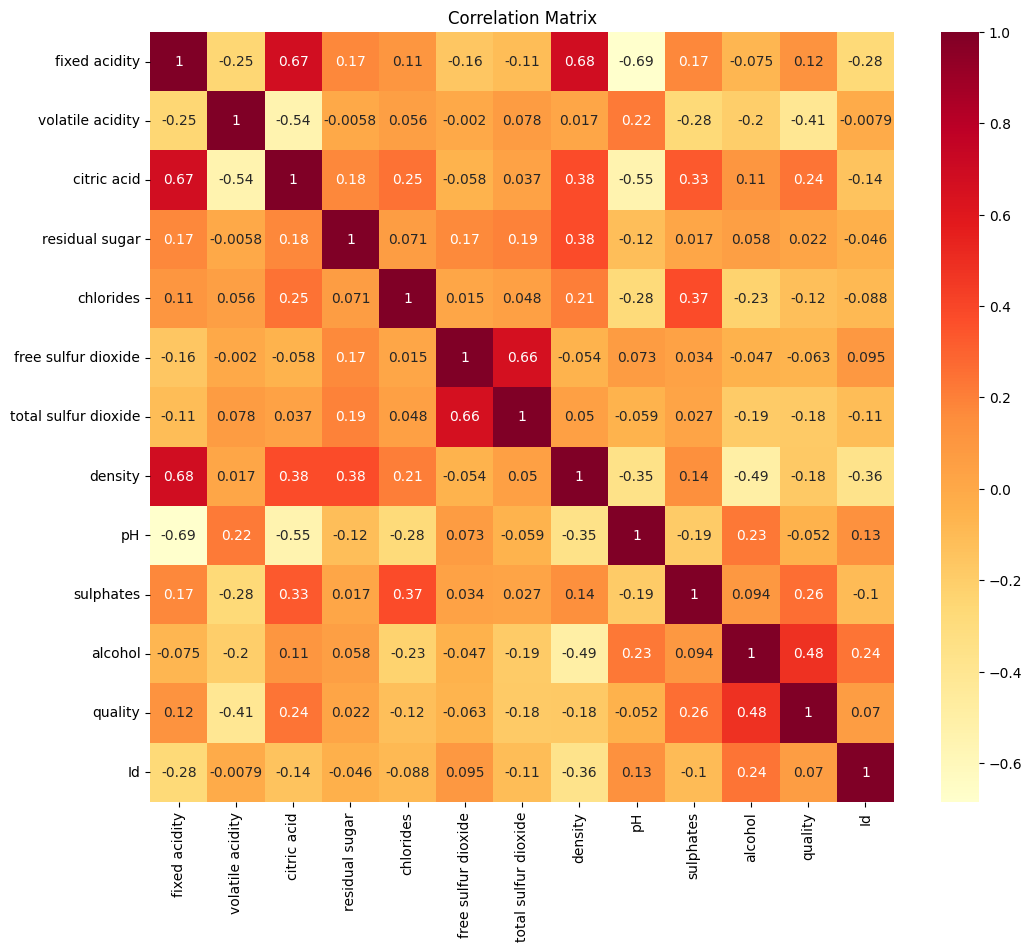

In [8]:
# Correlation matrix
corr = wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

Comme on peut voir, aucune des variables n'est clairement redondantes ou inutiles (le plus haut score de corrélation est de ~0.69 qui est relativement bas pour expliquer la suppression de la classe entière).

#### 3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.

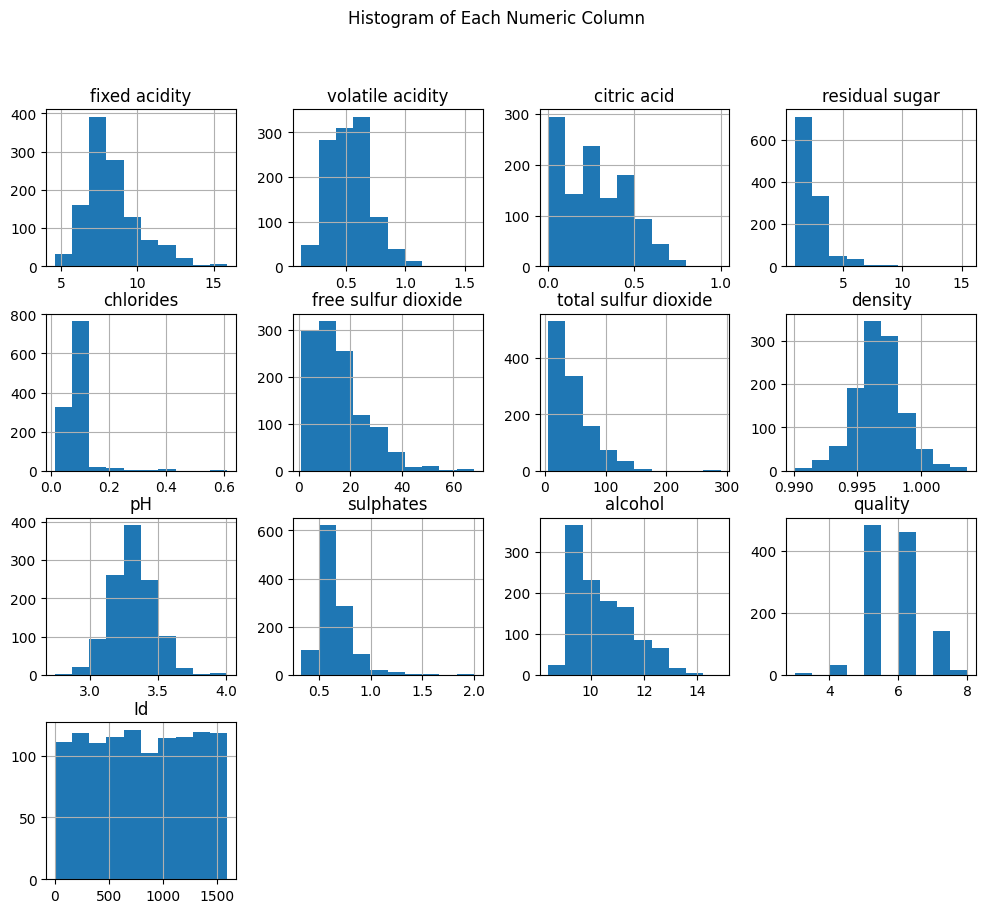

In [7]:
wine.hist(figsize=(12, 10))
plt.suptitle('Histogram of Each Numeric Column')
plt.show()

<Figure size 1200x1000 with 0 Axes>

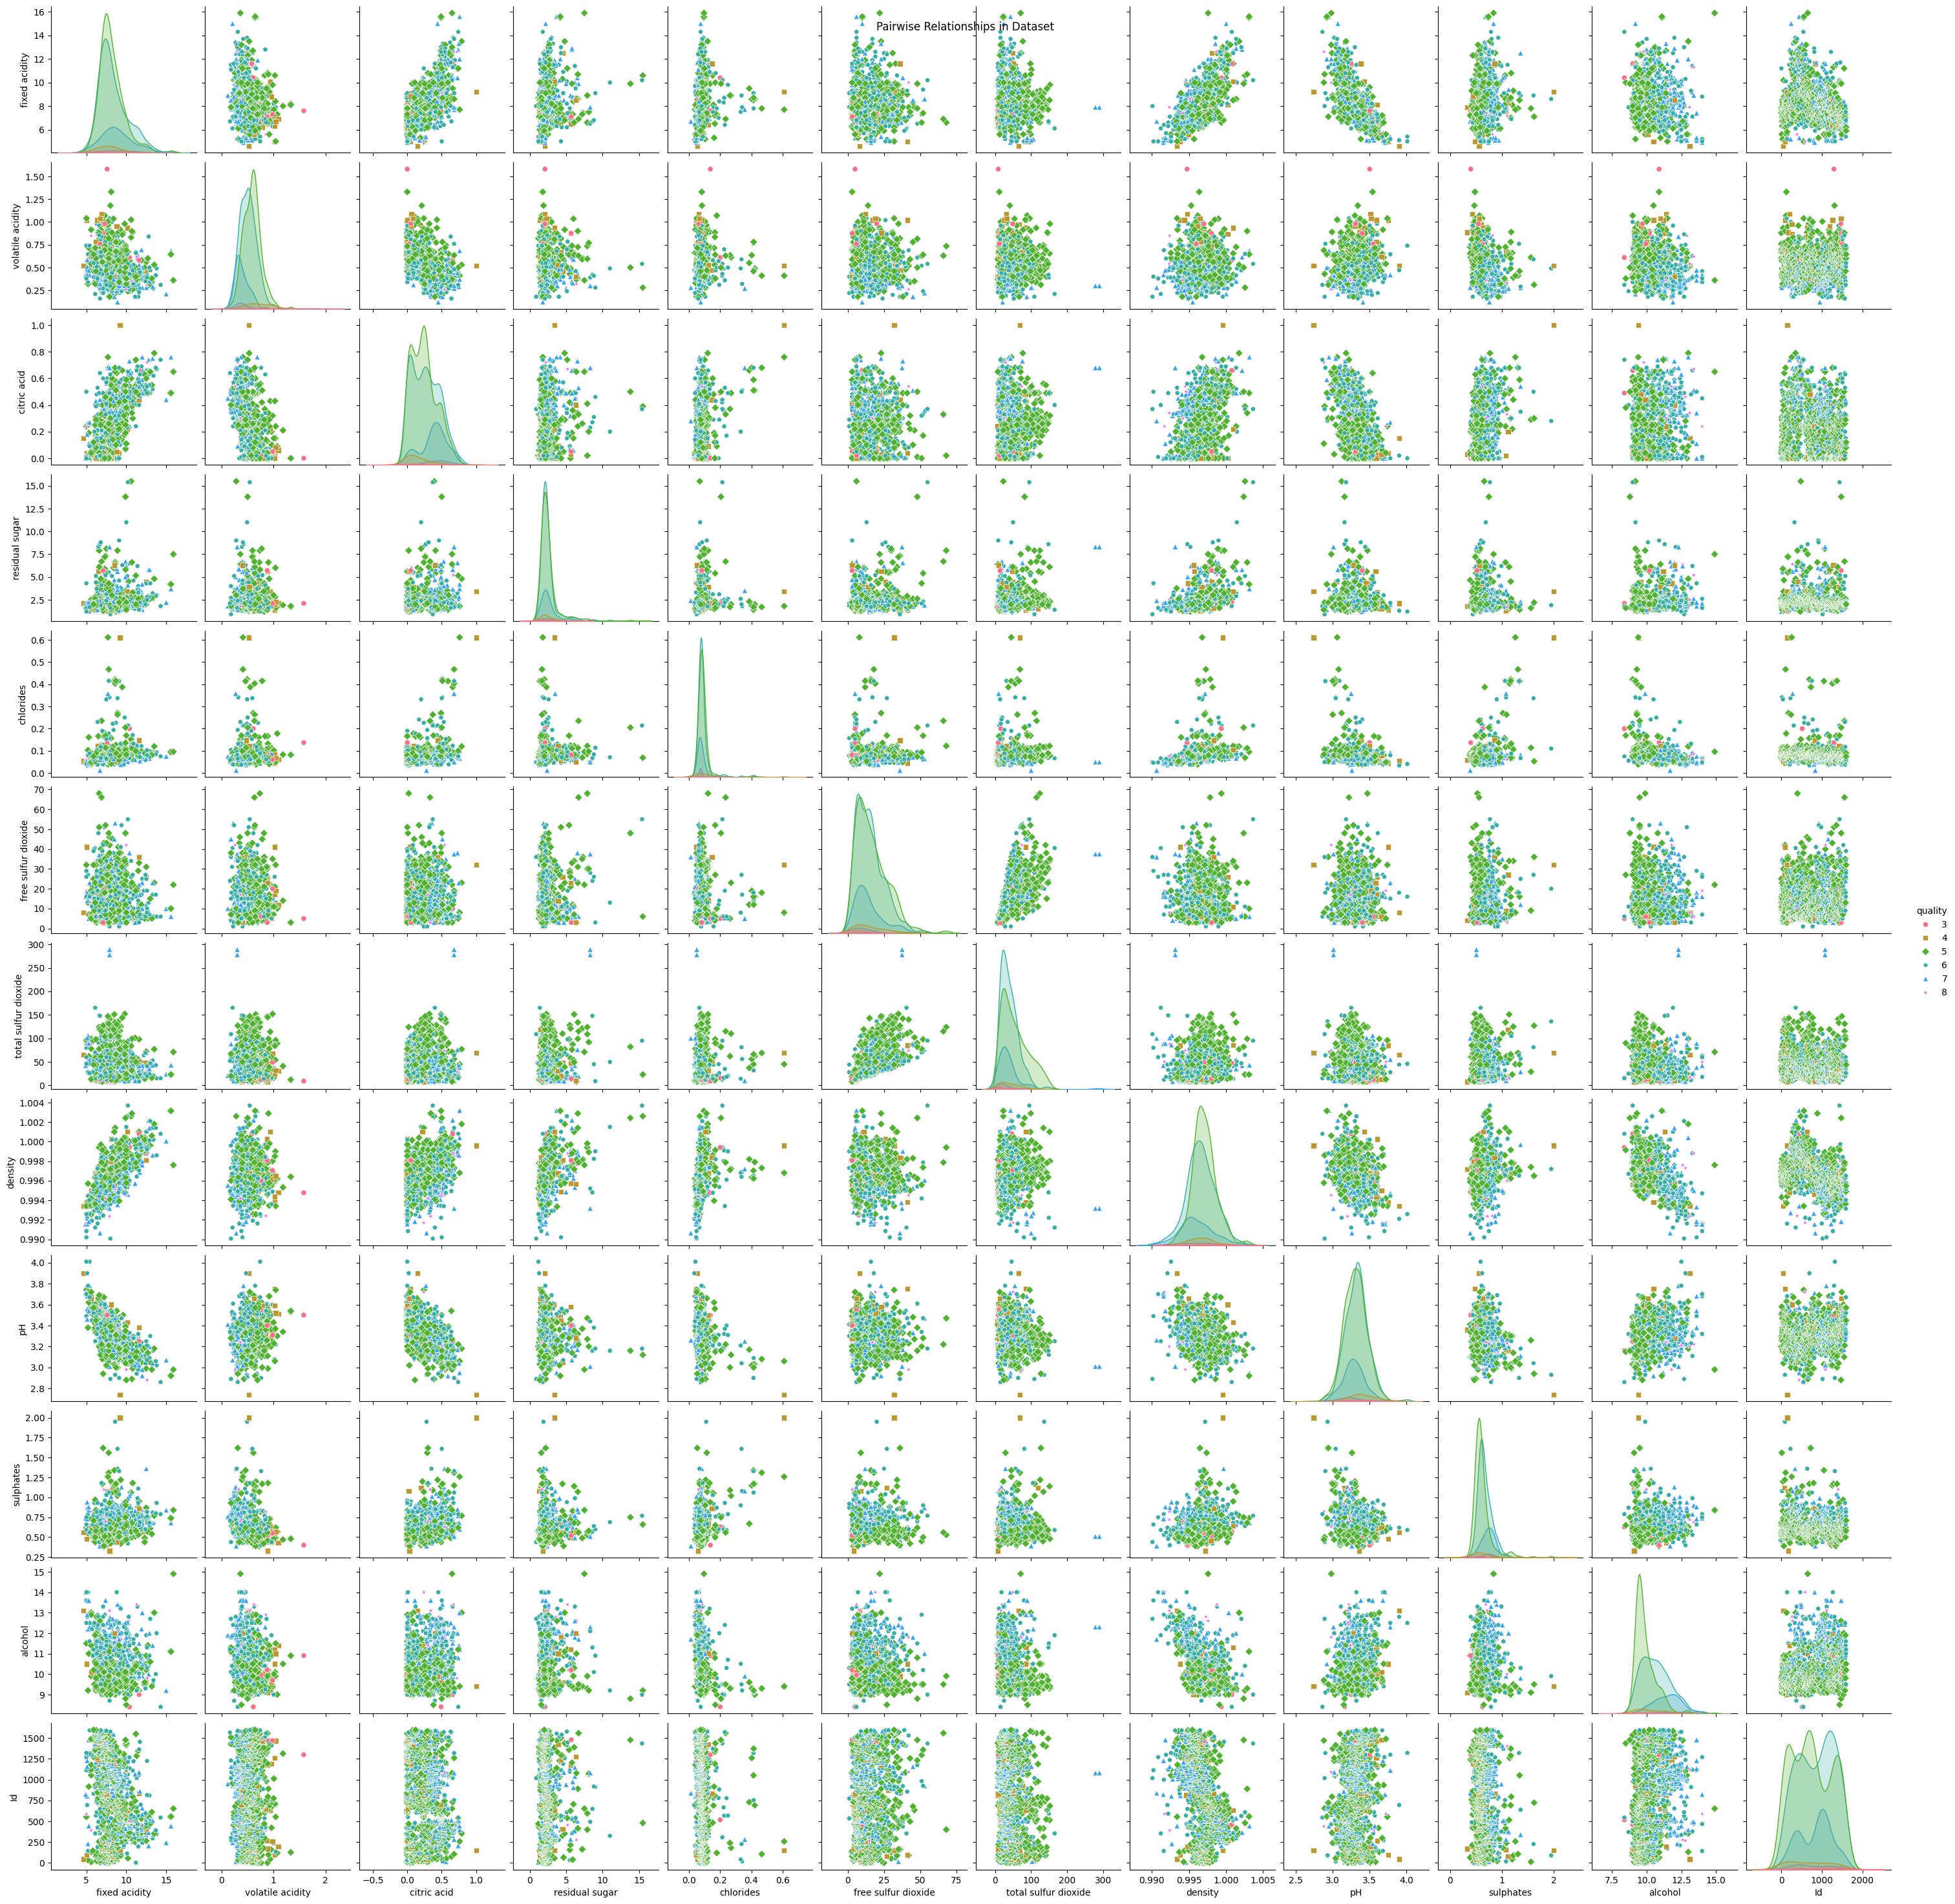

In [8]:
palette = sns.color_palette("husl", len(wine['quality'].unique()))

plt.figure(figsize=(12, 10))
sns.pairplot(wine, diag_kind='kde', hue='quality', palette=palette ,markers=['o', 's', 'D', 'p', '^', '*'])
plt.suptitle('Pairwise Relationships in Dataset')
plt.show()

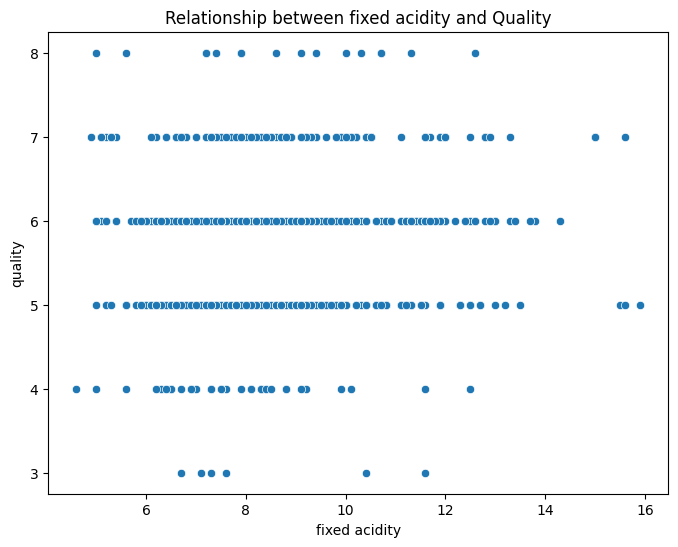

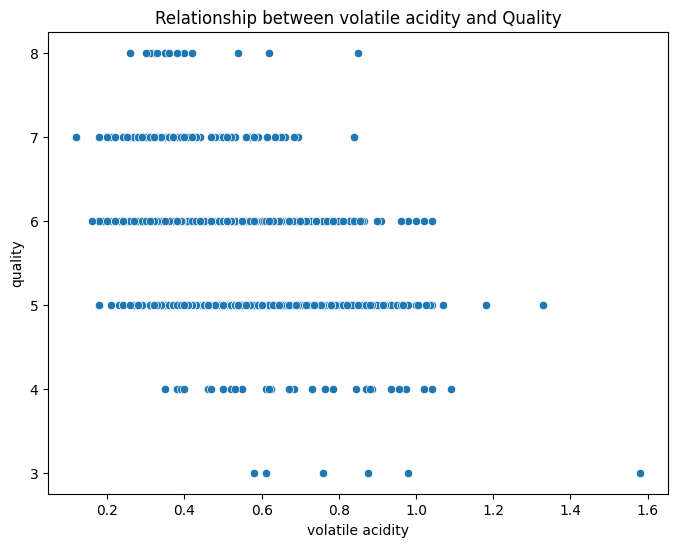

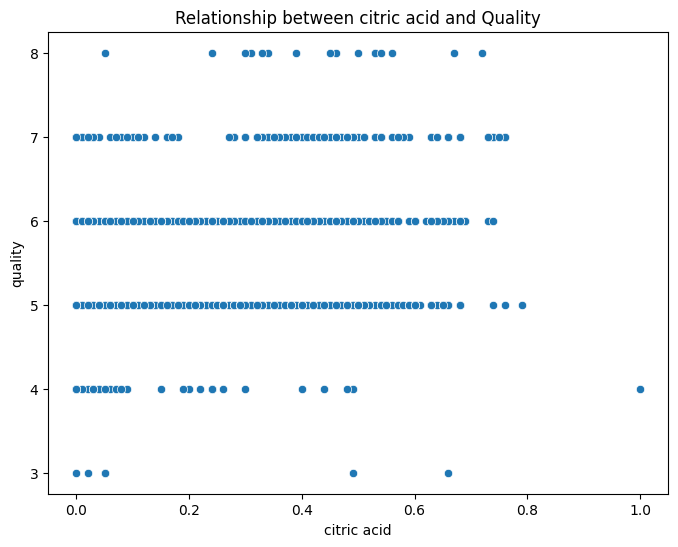

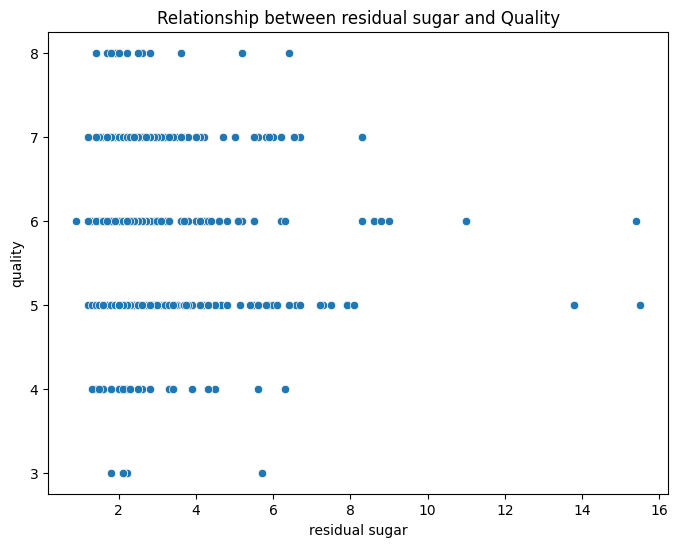

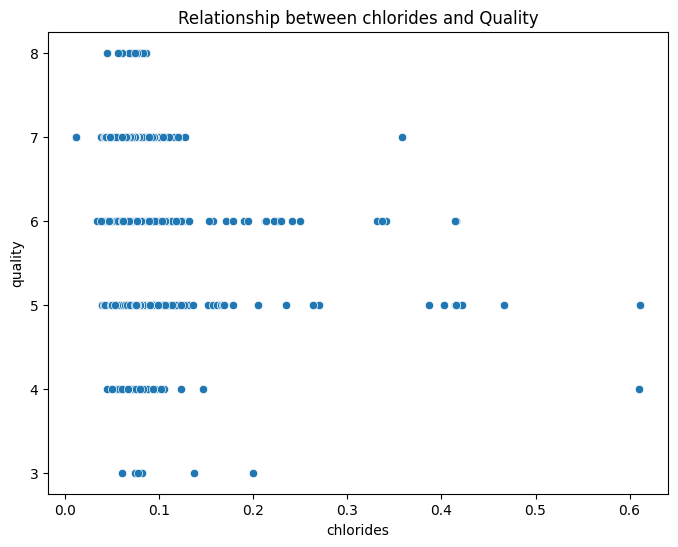

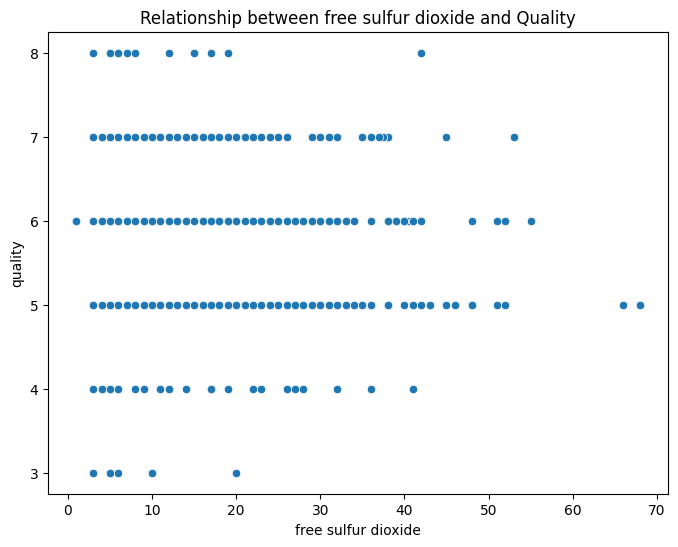

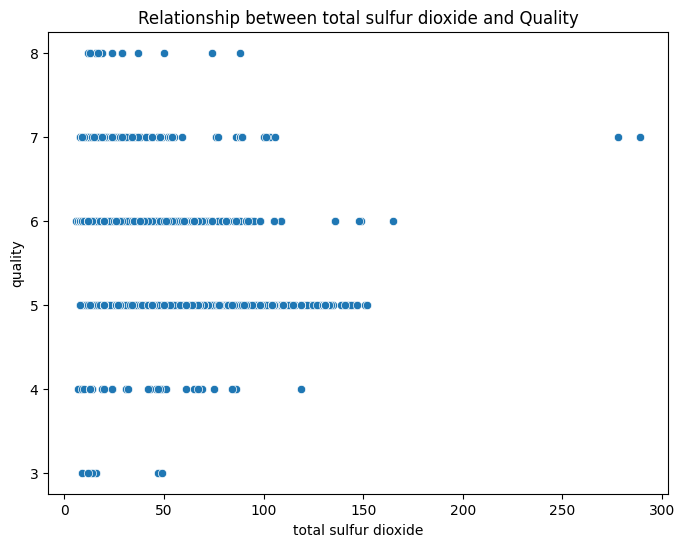

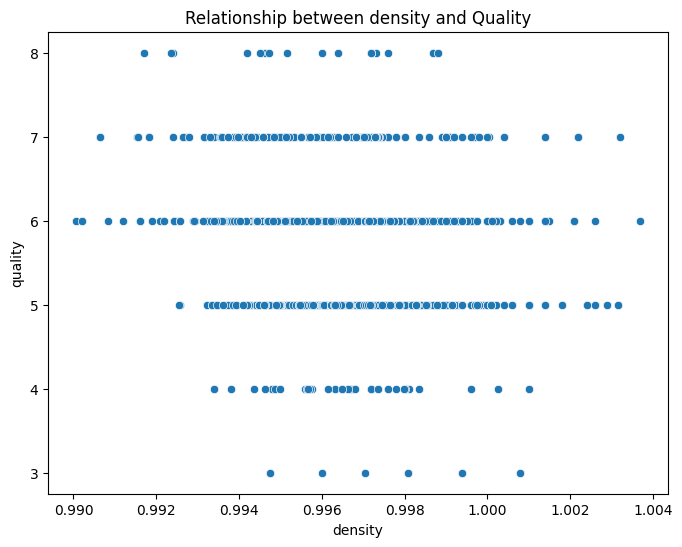

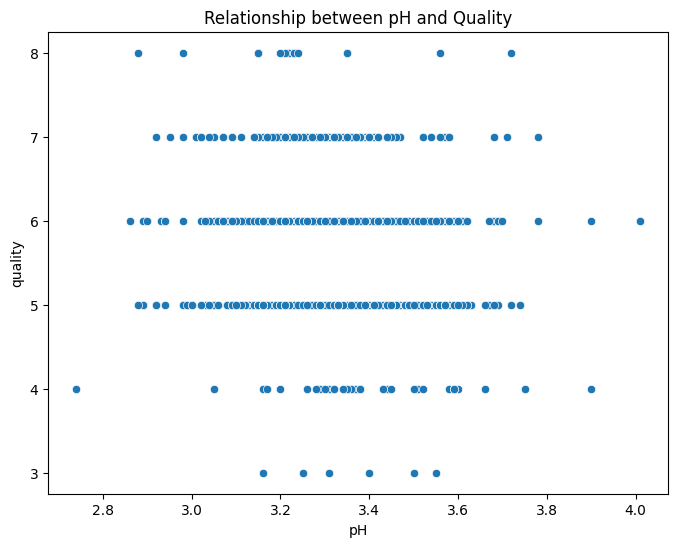

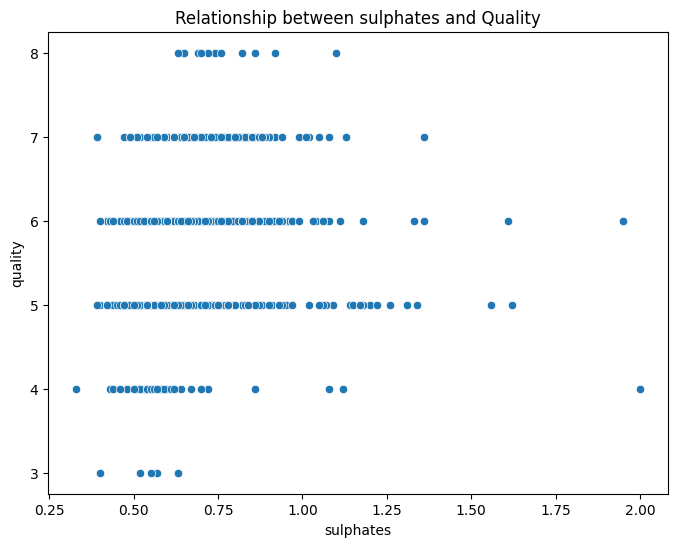

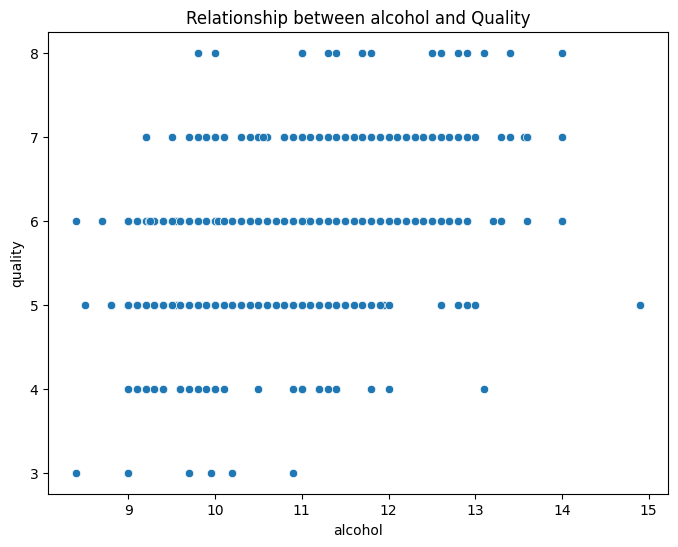

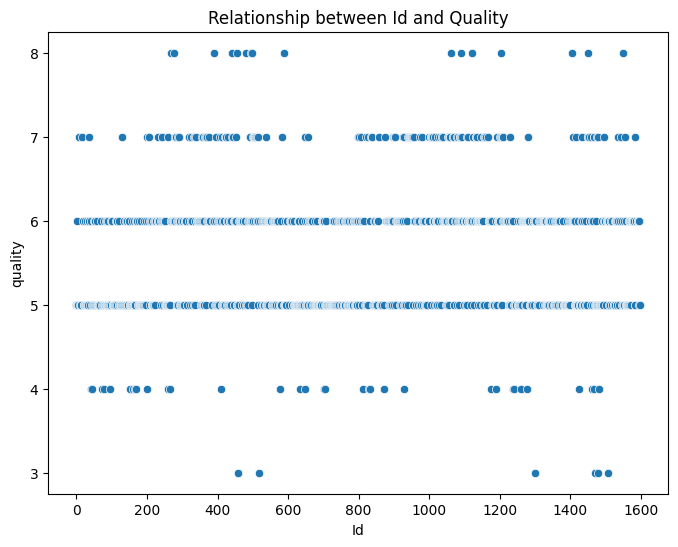

In [10]:
for col in wine.columns:
    if col != 'quality':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='quality', data=wine)
        plt.title(f'Relationship between {col} and Quality')
        plt.show()

En examinant notre jeu de données, on peut voir que la distribution de chaque attribut est relativement normale, avec quelques valeurs aberrantes. Par exemple, les variables `residual sugar` et `chloride` ont une distribution très asymétrique, avec des valeurs aberrantes qui pourraient être considérées comme des valeurs extrêmes.
On remarque aussi qu'il n'y a pas vraiment une combinaison d'attributs qui semble être fortement corrélée, ce qui est une bonne nouvelle pour notre tâche de classification.

## 4. **Analyse de la distribution des classes**

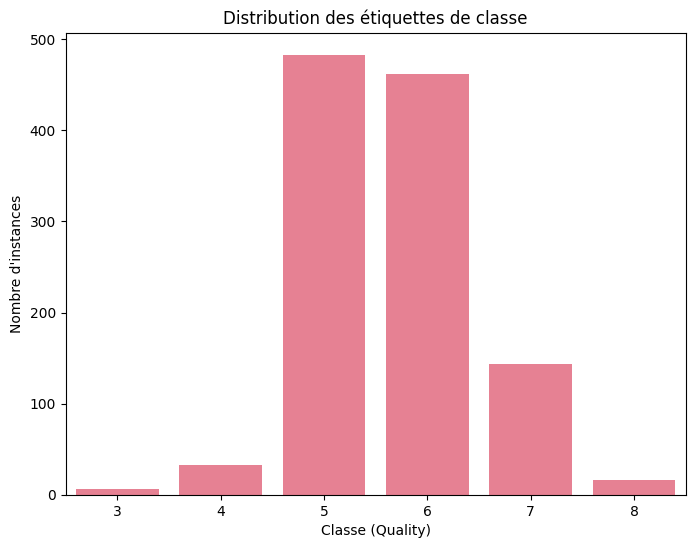

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine)
plt.title('Distribution des étiquettes de classe')
plt.xlabel('Classe (Quality)')
plt.ylabel('Nombre d\'instances')
plt.show()

<Figure size 1000x600 with 0 Axes>

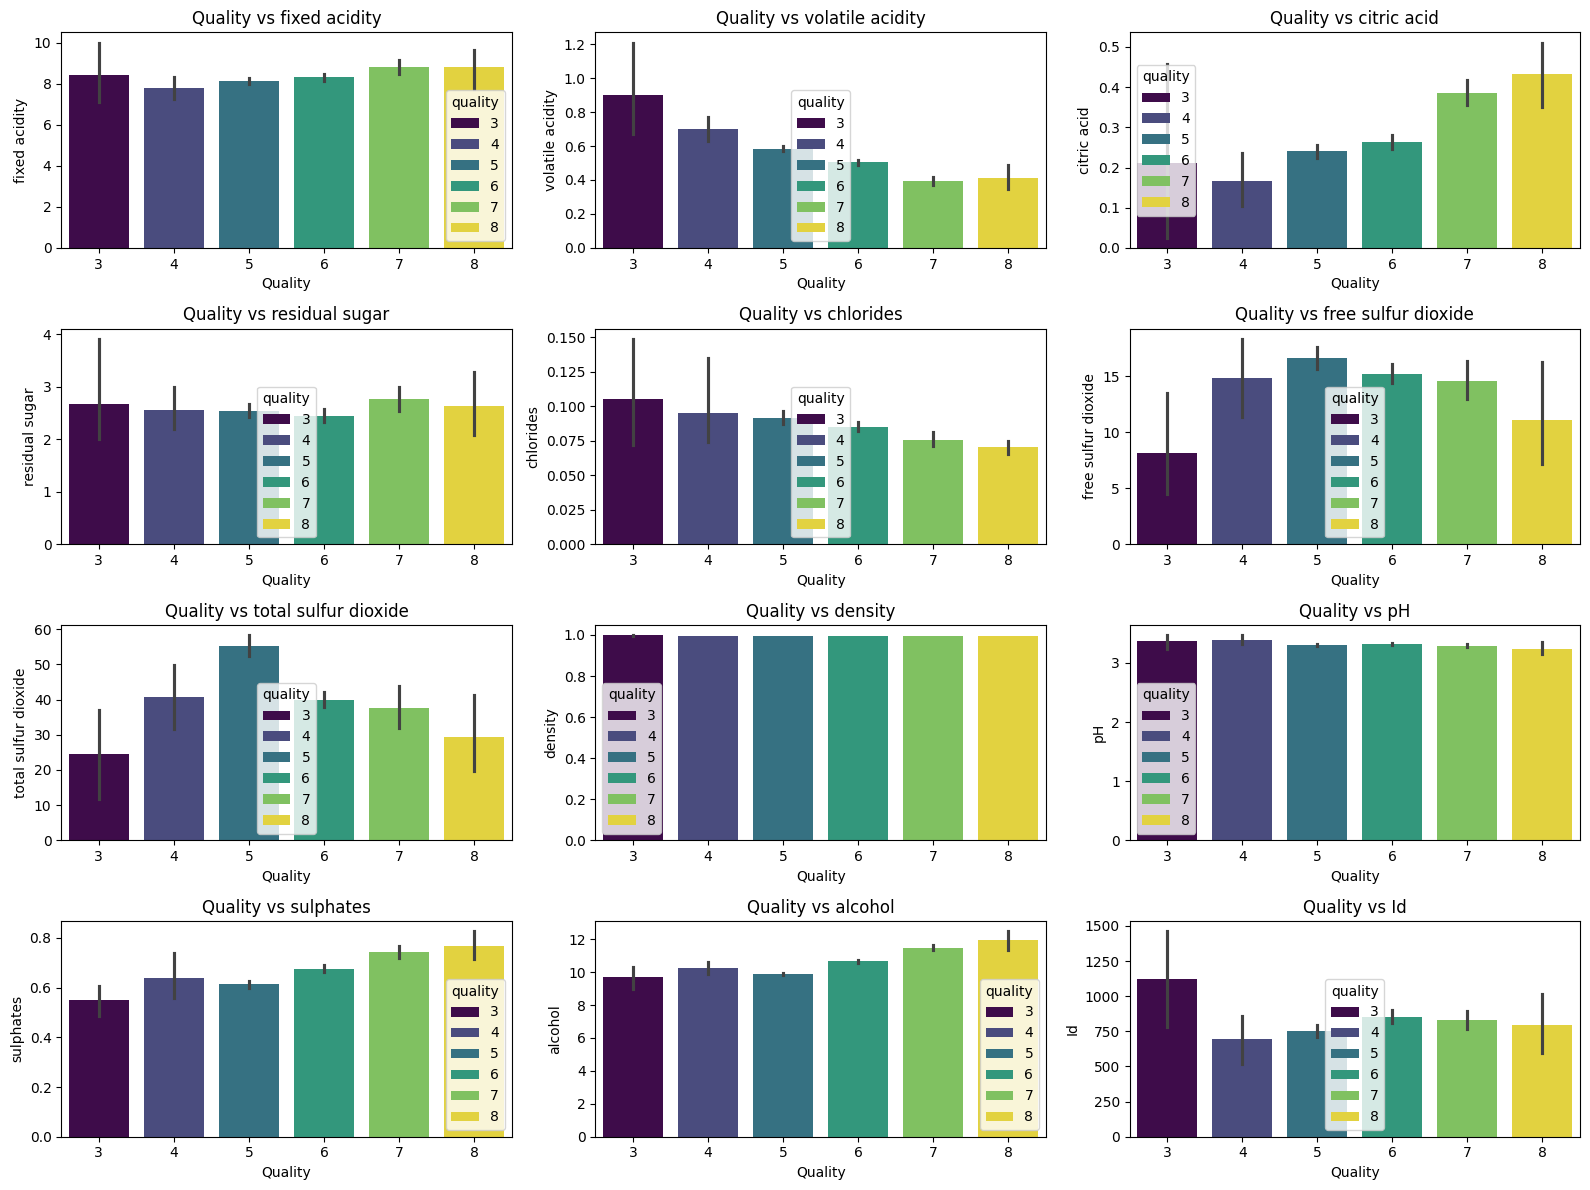

In [15]:
fig = plt.figure(figsize=(10, 6))

features = [col for col in wine.columns if col != 'quality']

num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols

    sns.barplot(x='quality', y=feature, data=wine, ax=axes[row, col], palette='viridis', hue='quality')
    axes[row, col].set_title(f'Quality vs {feature}')
    axes[row, col].set_xlabel('Quality')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

Notre distribution de classes est totalement déséquilibrée. On a beaucoup plus de vins de qualité moyenne que de vins de qualité basse ou haute. 
Cela pourrait poser un problème pour notre tâche de classification, car notre modèle pourrait être biaisé en faveur de la classe majoritaire.
On pourrait utiliser des techniques de sur-échantillonnage ou de sous-échantillonnage pour équilibrer les classes, ou utiliser des algorithmes qui prennent en compte le déséquilibre des classes, comme les forêts aléatoires ou les SVM.
Quant au distribution des attributs par classe, on peut voir que la distribution des attributs est relativement similaire pour chaque classe, ce qui est une bonne nouvelle pour notre tâche de classification.

## 5. **Prétraitement** : 

#### 5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).
Dans notre cas, on remarque qu'on a plusieurs variables qui sont très asymétriques, tenant vers la droite. Une transformation qui pourrait être utile serait la transformation logarithmique, qui permettrait de réduire l'asymétrie et de réduire l'impact des valeurs aberrantes.
Les valeurs qu'on va transformer sont `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `sulphates`, et `alcohol`.


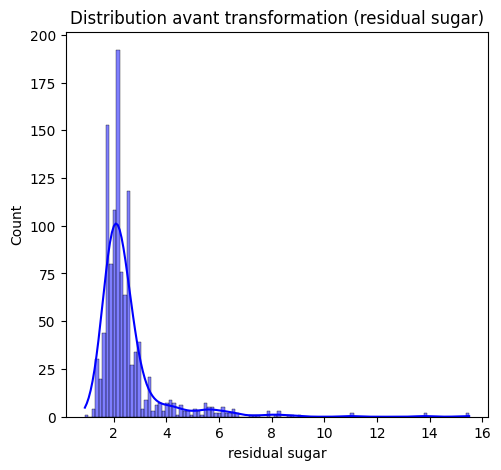

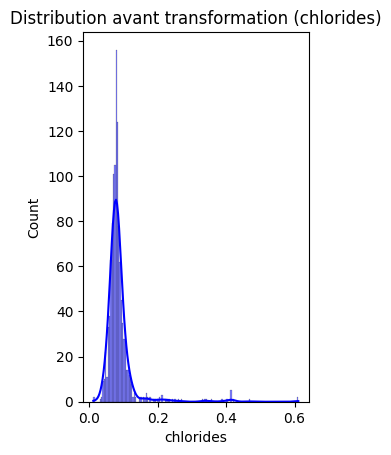

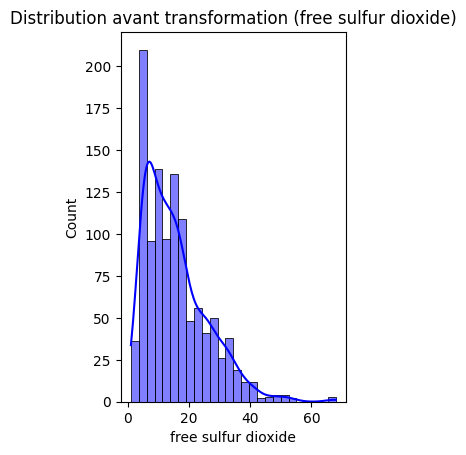

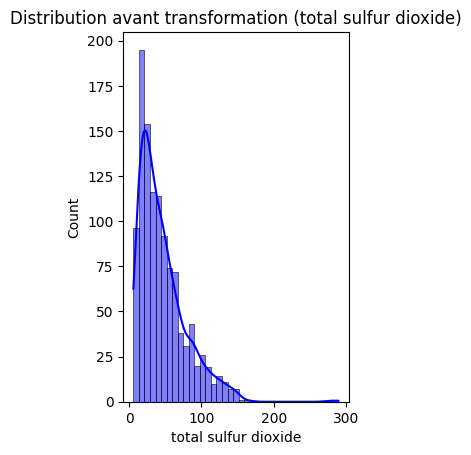

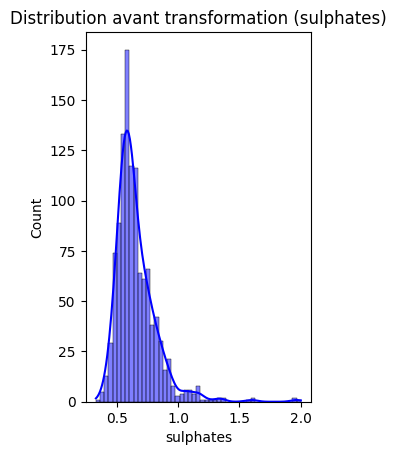

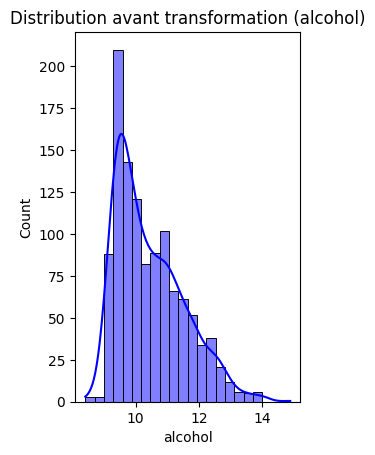

In [38]:
from sklearn.preprocessing import PowerTransformer

# Afficher la distribution avant transformation
plt.figure(figsize=(12, 5))
columns_to_transform = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
# Montre la distribution avant transformation
for i, col in enumerate(columns_to_transform):
    # Create a new subplot for each column
    plt.subplot(1, 2, 1)
    sns.histplot(wine[col], kde=True, color='blue')
    plt.title(f'Distribution avant transformation ({col})')
    plt.xlabel(col)
    plt.show()


# # Distribution avant transformation (exemple avec 'residual sugar')
# plt.subplot(1, 2, 1)
# sns.histplot(wine['residual sugar'], kde=True, color='blue')
# plt.title('Distribution avant transformation (residual sugar)')
# plt.xlabel('Residual Sugar')

#

In [40]:
# On applique la transformation logarithmique
wine['log_residual_sugar'] = np.log1p(wine['residual sugar'])
wine['log_chlorides'] = np.log1p(wine['chlorides'])
wine['log_free_sulfur_dioxide'] = np.log1p(wine['free sulfur dioxide'])
wine['log_total_sulfur_dioxide'] = np.log1p(wine['total sulfur dioxide'])
wine['log_sulphates'] = np.log1p(wine['sulphates'])
wine['log_alcohol'] = np.log1p(wine['alcohol'])


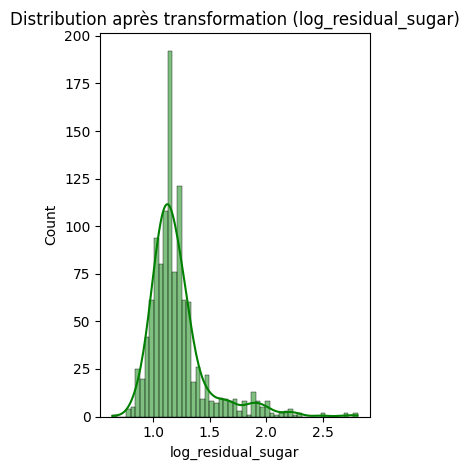

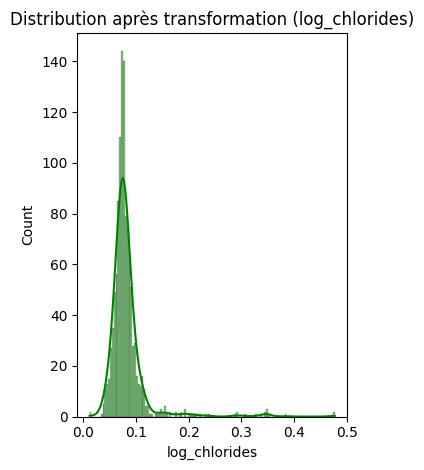

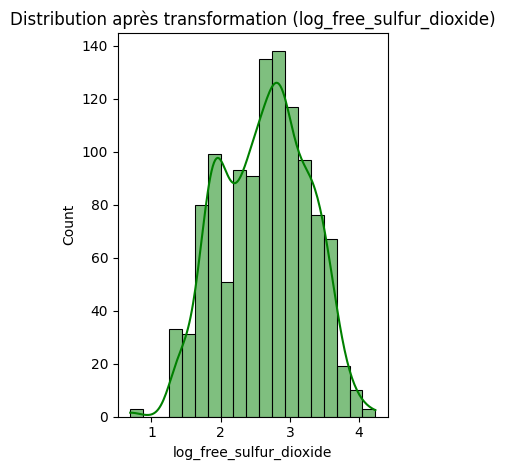

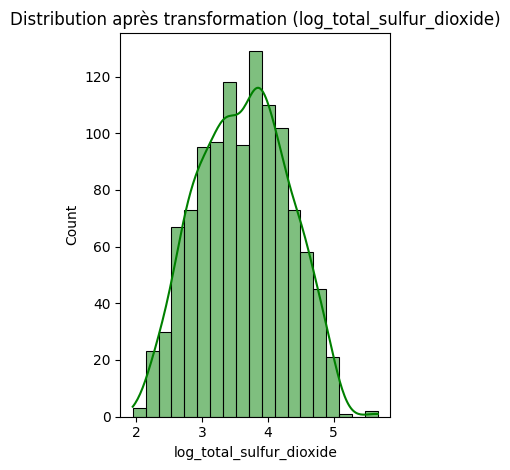

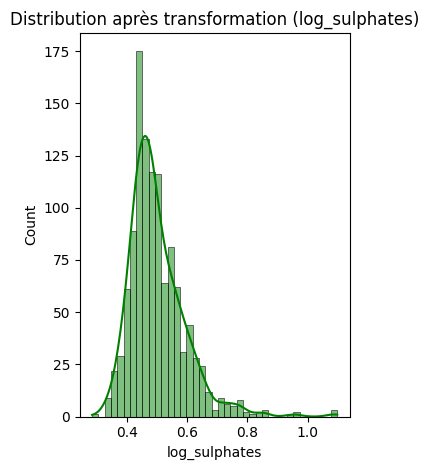

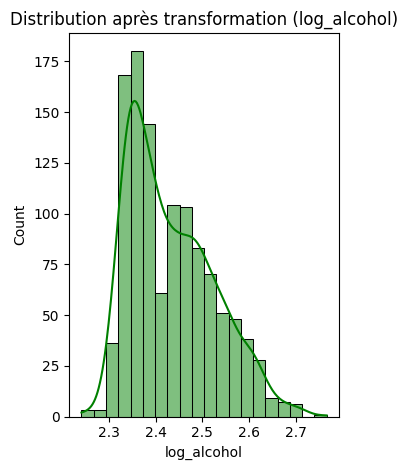

In [41]:
new_columns = ['log_residual_sugar', 'log_chlorides', 'log_free_sulfur_dioxide', 'log_total_sulfur_dioxide', 'log_sulphates', 'log_alcohol']
# Distribution après transformation
plt.subplot(1, 2, 2)

for i, col in enumerate(new_columns):
    plt.subplot(1, 2, 2)
    sns.histplot(wine[col], kde=True, color='green')
    plt.title(f'Distribution après transformation ({col})')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#### 5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).
Dans notre jeu de données, nous n'avons pas de variables catégorielles, mais nous allons en ajouter une qui catégorise la qualité du vin en 3 classes : basse, moyenne et haute.
Nous utiliserons ensuite l'encodeur one-hot pour encoder cette variable catégorielle.

In [42]:
bins = (2, 5, 7, 8.5)
group_names = ['bad', 'normal', 'good']

wine['quality_class'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality_class'].value_counts()

quality_class
normal    605
bad       522
good       16
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
one_hot_encod = encoder.fit_transform(wine[['quality_class']])
wine = pd.concat([wine, pd.DataFrame(one_hot_encod.toarray(), columns=group_names)], axis=1)
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      ...  log_residual_sugar  log_chlorides  log_free_sulfur_dioxide  \
0     ...            1.064711       0.073250                 2.484907   
1     ...            1.280934       0.093490                 3.258097   
2     ...            1.193922       0.088011                 2.772589   
3     ...            1.064711       0.072321                 2.890372   
4     ...            1.064711       0.073250                 2.484907   
...   ...                 ...            ...                      ...   
1138  ...            1.193922       0.073250                 3.401197   
1139  ...            1.064711       0.065788                 3.367296   
1140  ...            1.098612       0.086178                 3.496508   
1141  ...            1.163151       0.060154                 3.688879   
1142  ...            1.098612       0.072321                 3.496508   

      log_total_sulfur_dioxide  log_sulphates  log_alcohol  quality_class  \
0                     3.555348       0.444686     2.341806            bad   
1                     4.219508       0.518794     2.379546            bad   
2                     4.007333       0.500775     2.379546            bad   
3                     4.110874       0.457425     2.379546         normal   
4                     3.555348       0.444686     2.341806            bad   
...                        ...            ...          ...            ...   
1138                  3.713572       0.559616     2.484907         normal   
1139                  3.663562       0.598837     2.351375         normal   
1140                  3.806662       0.457425     2.442347            bad   
1141                  3.951244       0.565314     2.501436         normal   
1142                  3.806662       0.536493     2.415914            bad   

      bad  normal good  
0     1.0     0.0  0.0  
1     1.0     0.0  0.0  
2     1.0     0.0  0.0  
3     0.0     0.0  1.0  
4     1.0     0.0  0.0  
...   ...     ...  ...  
1138  0.0     0.0  1.0  
1139  0.0     0.0  1.0  
1140  1.0     0.0  0.0  
1141  0.0     0.0  1.0  
1142  1.0     0.0  0.0  

[1143

## 6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.


In [48]:
X = wine[['fixed acidity', 'log_residual_sugar', 'log_chlorides', 'log_free_sulfur_dioxide', 'log_total_sulfur_dioxide', 'log_sulphates', 'log_alcohol', 'volatile acidity', 'citric acid', 'density', 'pH']]
X

fixed acidity  log_residual_sugar  log_chlorides  \
0               7.4            1.064711       0.073250   
1               7.8            1.280934       0.093490   
2               7.8            1.193922       0.088011   
3              11.2            1.064711       0.072321   
4               7.4            1.064711       0.073250   
...             ...                 ...            ...   
1138            6.3            1.193922       0.073250   
1139            6.8            1.064711       0.065788   
1140            6.2            1.098612       0.086178   
1141            5.9            1.163151       0.060154   
1142            5.9            1.098612       0.072321   

      log_free_sulfur_dioxide  log_total_sulfur_dioxide  log_sulphates  \
0                    2.484907                  3.555348       0.444686   
1                    3.258097                  4.219508       0.518794   
2                    2.772589                  4.007333       0.500775   
3                    2.890372                  4.110874       0.457425   
4                    2.484907                  3.555348       0.444686   
...                       ...                       ...            ...   
1138                 3.401197                  3.713572       0.559616   
1139                 3.367296                  3.663562       0.598837   
1140                 3.496508                  3.806662       0.457425   
1141                 3.688879                  3.951244       0.565314   
1142                 3.496508                  3.806662       0.536493   

      log_alcohol  volatile acidity  citric acid  density    pH  
0        2.341806             0.700         0.00  0.99780  3.51  
1        2.379546             0.880         0.00  0.99680  3.20  
2        2.379546             0.760         0.04  0.99700  3.26  
3        2.379546             0.280         0.56  0.99800  3.16  
4        2.341806             0.700         0.00  0.99780  3.51  
...           ...               ...          ...      ...   ...  
1138     2.484907             0.510         0.13  0.99574  3.42  
1139     2.351375             0.620         0.08  0.99651  3.42  
1140     2.442347             0.600         0.08  0.99490  3.45  
1141     2.501436             0.550         0.10  0.99512  3.52  
1142     2.415914             0.645         0.12  0.99547  3.57  

[1143 rows x 11 columns]

In [49]:
y = wine[['bad', 'normal', 'good']]
y

bad  normal  good
0     1.0     0.0   0.0
1     1.0     0.0   0.0
2     1.0     0.0   0.0
3     0.0     0.0   1.0
4     1.0     0.0   0.0
...   ...     ...   ...
1138  0.0     0.0   1.0
1139  0.0     0.0   1.0
1140  1.0     0.0   0.0
1141  0.0     0.0   1.0
1142  1.0     0.0   0.0

[1143 rows x 3 columns]

## 7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 8. **Entraînement et visualisation** :

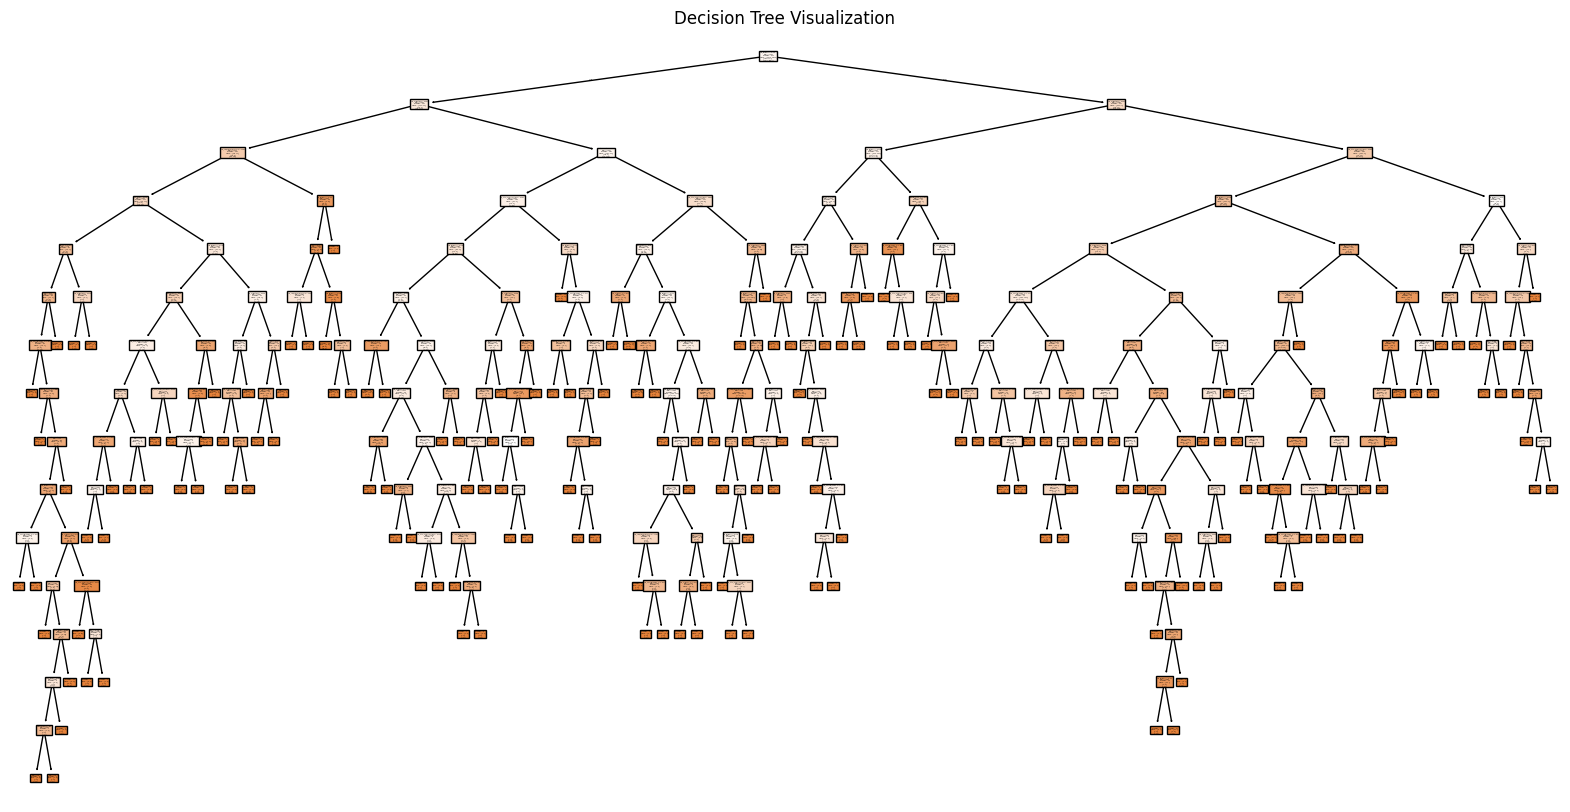

In [53]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=group_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

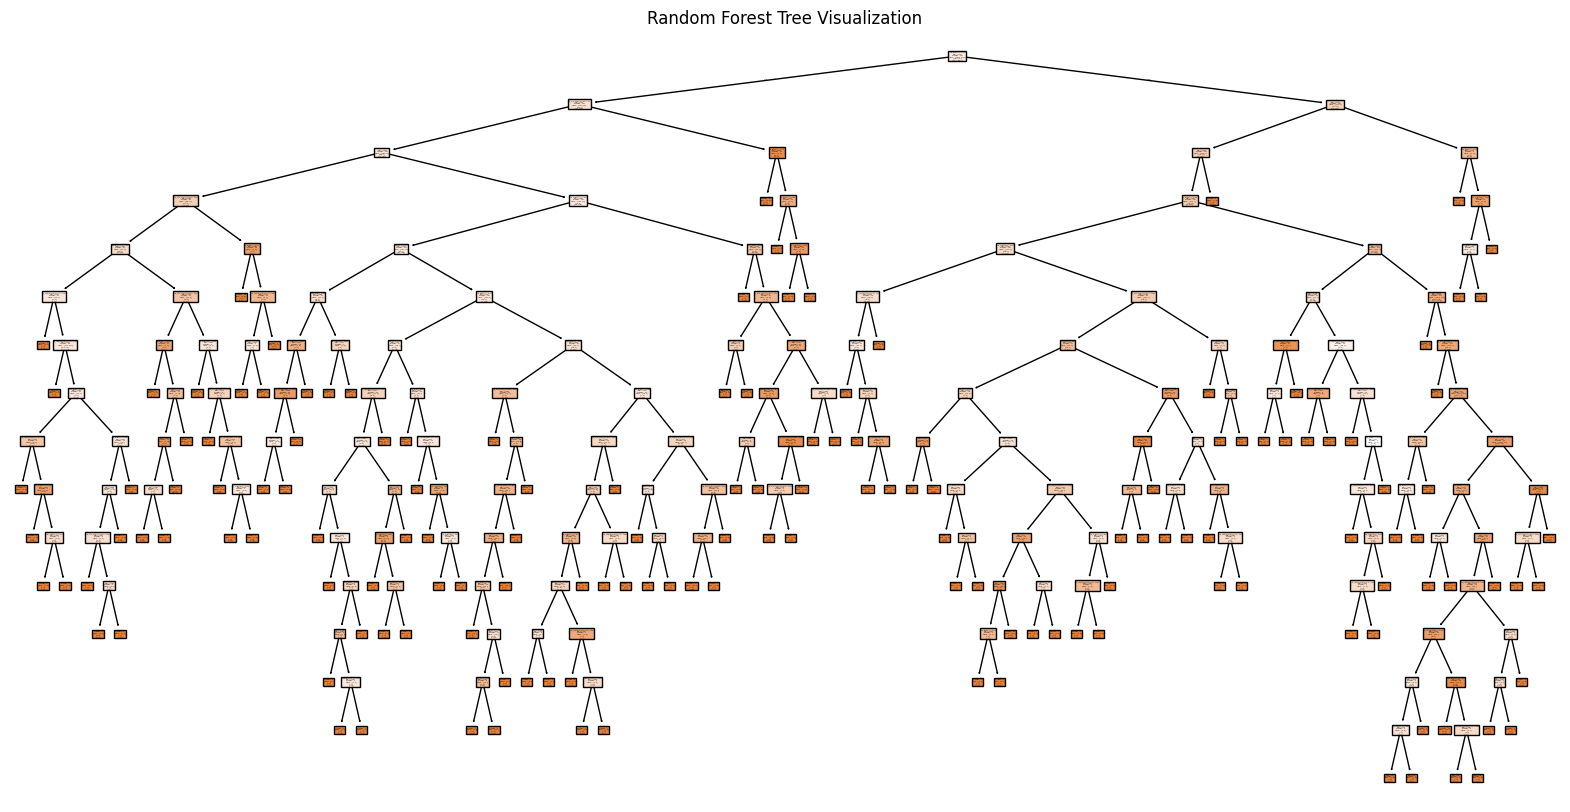

In [54]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=group_names, filled=True)
plt.title("Random Forest Tree Visualization")
plt.show()

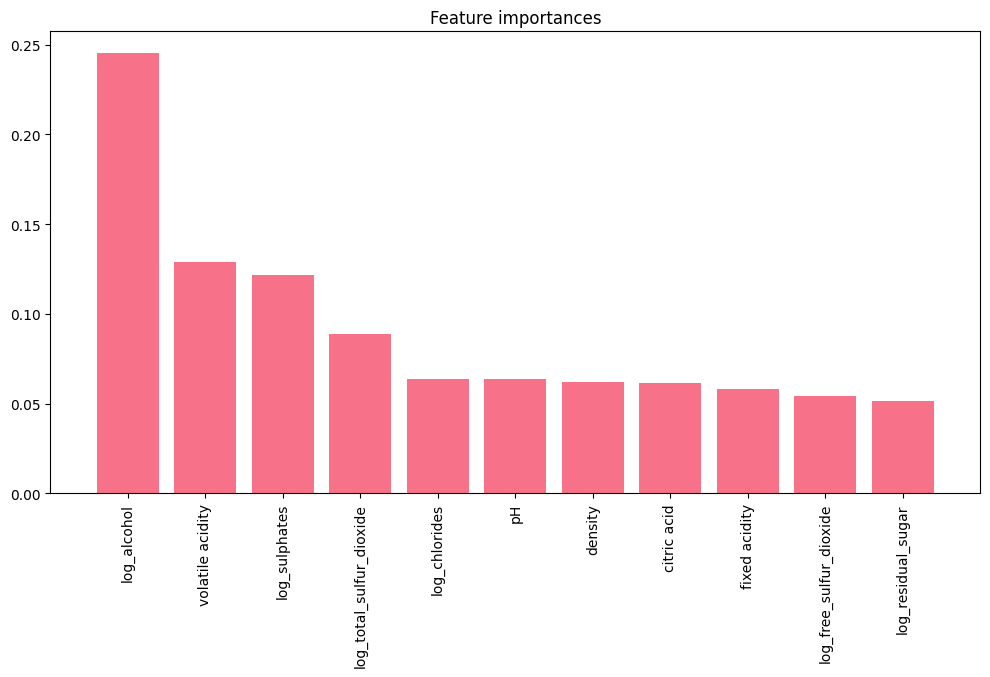

In [55]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature ranking
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


--------------------------------------------------------------------------

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".